In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 16})

In [7]:
df = pd.read_csv("HCI_final.csv")
columns = ['StartDate', 'EndDate','Status','IPAddress','Progress','Duration (in seconds)',
           'Finished','RecordedDate','ResponseId','RecipientLastName','RecipientFirstName',
           'RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude',
           'DistributionChannel','UserLanguage', 'Q7_4_TEXT - Topics', 'Q7_4_TEXT - Parent Topics']

common_cols = ['Q1', 'Q1_6_TEXT', 'Q2']
car_no_cols = ['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q7_4_TEXT',
               'Q8_1', 'Q8_2', 'Q8_3', 'Q9', 'Q10']


df.drop(columns=columns, inplace=True)
df.drop(df.index[1], inplace=True)
df = df.reset_index(drop=True)
df.head(5)


,Q1,Q1_6_TEXT,Q2,Q3,Q4,Q5,Q6,Q7,Q7_4_TEXT,Q8_1,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,What is the grocery store you often go to? - S...,What is the grocery store you often go to? - O...,Do you have a car?,Did you ever face a situation when you needed ...,If a student from UofM (whom you don’t know) o...,How likely would you prefer to go grocery shop...,If a student from UofM gives you a ride to go ...,How much incentive are you willing to pay a st...,How much incentive are you willing to pay a st...,If you need a ride urgently (other than grocer...,...,"Suppose, you are going to the grocery and anot...","As an international student, would you prefer ...",How often do you go to the grocery in a month?,"After getting a car, did you ever need a ride ...",How likely do you want incentives to give ride...,How much incentive would you expect from a Uof...,Select all the information that you would like...,Which days do yWhich ou go to grocery shops in...,"Suppose, you need to pick up your friend from ...",Which time do you go to the grocery mostly?
1,Other (Please mention below),NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Most of the time,Yes,It varies month to month,No,Somewhat likely,None at all,Photo ID,Thurs,2 miles,Afternoon
2,Kroger,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Walmart,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,No,Once a week,No,Somewhat unlikely,None at all,Other,"Sat,Sun,Thurs,Fri",> 3 miles,Afternoon
4,Kroger,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Always,Yes,It varies month to month,Yes,Extremely likely,None at all,Student ID,"Sat,Tues",> 3 miles,Evening


In [4]:
car_yes_df = df[df['Q2'] == 'Yes']
car_no_df = df[df['Q2'] == 'No']
print(car_yes_df.shape[1], car_no_df.shape[1])

car_no_df = car_no_df[common_cols+car_no_cols].reset_index(drop=True)
car_yes_df = car_yes_df.drop(columns=car_no_cols).reset_index(drop=True)
print(car_yes_df.shape[1], car_no_df.shape[1])
car_yes_df.head(5)

24 24
13 14


,Q1,Q1_6_TEXT,Q2,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,Other (Please mention below),NaN,Yes,Most of the time,Yes,It varies month to month,No,Somewhat likely,None at all,Photo ID,Thurs,2 miles,Afternoon
1,Walmart,NaN,Yes,Sometimes,No,Once a week,No,Somewhat unlikely,None at all,Other,"Sat,Sun,Thurs,Fri",> 3 miles,Afternoon
2,Kroger,NaN,Yes,Always,Yes,It varies month to month,Yes,Extremely likely,None at all,Student ID,"Sat,Tues",> 3 miles,Evening
3,Walmart,NaN,Yes,Sometimes,Yes,2-3 times in a month,No,Somewhat likely,A moderate amount,Name,Sat,2 miles,Noon
4,Kroger,NaN,Yes,Most of the time,No,Once a week,No,Neither likely nor unlikely,A little,"Name,Department,Photo ID","Sat,Sun",> 3 miles,Morning


## Do you have a car?

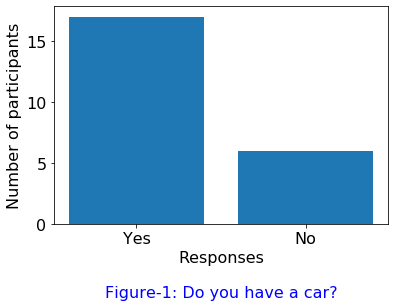

In [10]:
ncar_yes = car_yes_df.shape[0]
ncar_no = car_no_df.shape[0]

r = ['Yes', 'No']
y = [ncar_yes, ncar_no]

text = "Figure-1: Do you have a car?"

ax = plt.bar(np.arange(len(r)), y)
plt.xticks(np.arange(len(r)), r)
plt.ylabel('Number of participants')
plt.xlabel('Responses')

#plt.title('Figure-1: Do you have a car?')
plt.text(0.5, -6, text, ha='center', color='BLUE')
plt.show()

## How likely would you prefer to go grocery shopping with someone from your country?
### Community preference

80.0000011920929
20.000000298023224


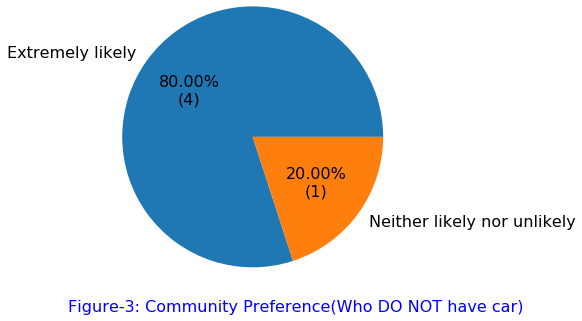

KeyError: 'Q5'

In [15]:
def myformat(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100) 

text = "Figure-3: Community Preference(Who DO NOT have car)"

n_count = car_no_df['Q5'].value_counts()
total = car_no_df['Q5'].count()
plt.pie(n_count, labels=n_count.index, radius=1.5, autopct=myformat)
plt.text(0.5, -2, text, ha='center', color='BLUE')
plt.show()

text = "Figure-4: Community Preference(Who DO have car)"

n_count = car_yes_df['Q5'].value_counts()
total = car_yes_df['Q5'].count()
plt.pie(n_count, labels=n_count.index, radius=1.5, autopct=myformat)
plt.text(0.5, -2, text, ha='center', color='BLUE')
plt.show()

## If a student from UofM (whom you don't know) offers to give you a ride, would you go to the grocery with him/her?

### How effective will TigerCarpool app be

80.0000011920929
20.000000298023224


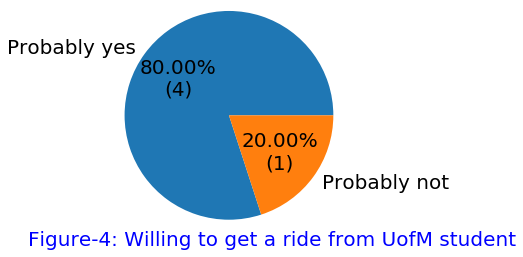

In [113]:
text = "Figure-4: Willing to get a ride from UofM student"
n_count = car_no_df['Q4'].value_counts()
total = car_no_df['Q4'].count()
plt.pie(n_count, labels=n_count.index, radius=1.2, autopct=myformat)
plt.text(0.5, -1.5, text, ha='center', color='BLUE')
plt.show()

## Did you ever face a situation when you needed to go to the grocery, but none of your friends were available to give a ride?

### How difficult is to get a ride

60.00000238418579
20.000000298023224
20.000000298023224


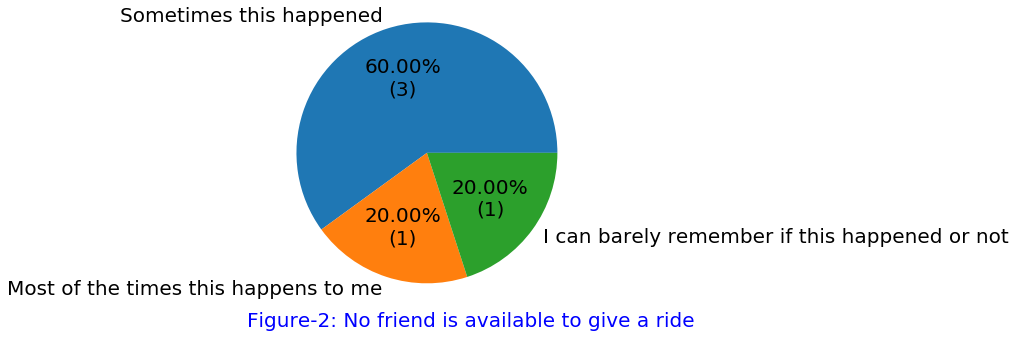

In [105]:
text = "Figure-2: No friend is available to give a ride"
n_count = car_no_df['Q3'].value_counts()
total = car_no_df['Q3'].count()
plt.pie(n_count, labels=n_count.index, radius=1.5, autopct=myformat)
plt.text(0.5, -2, text, ha='center', color='BLUE')
plt.show()

## Will riders give incentives 

40.00000059604645
20.000000298023224
20.000000298023224
20.000000298023224


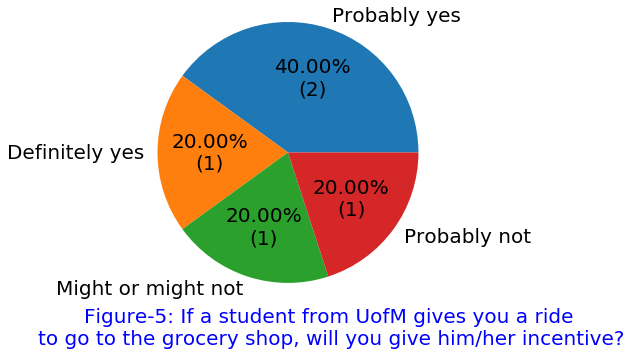

In [117]:
text = "Figure-5: If a student from UofM gives you a ride \nto go to the grocery shop, will you give him/her incentive?"
n_count = car_no_df['Q6'].value_counts()
total = car_no_df['Q6'].count()
plt.pie(n_count, labels=n_count.index,  radius=1.5, autopct=myformat)
plt.text(0.5, -2.2, text, ha='center', color='BLUE')
plt.show()

## Amount of incentive willing to give 

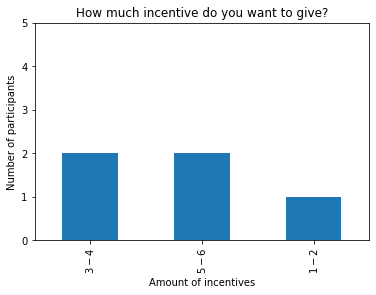

In [66]:
car_no_df['Q7'].value_counts().plot(kind='bar')

plt.yticks(np.arange(car_no_df.shape[0]))
plt.ylabel('Number of participants')
plt.xlabel('Amount of incentive')
plt.title('How much incentive do you want to give?')
plt.show()

# Driver
## willing to give ride to uofm students

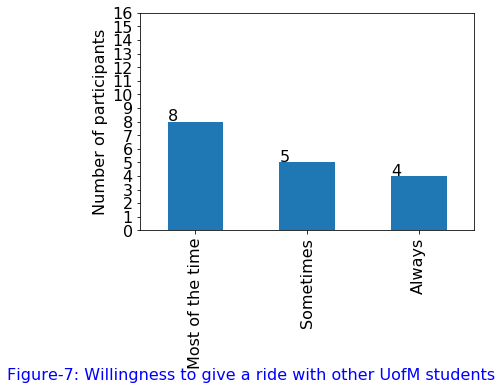

In [132]:
ax = car_yes_df['Q11'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

text = "Figure-7: Willingness to give a ride with other UofM students"
plt.yticks(np.arange(car_yes_df.shape[0]))
plt.ylabel('Number of participants')
plt.xlabel('')
plt.text(0.5, -11, text, ha='center', color='BLUE')
plt.show()

## frequency of going to grocery

29.411765933036804
29.411765933036804
29.411765933036804
11.764705926179886


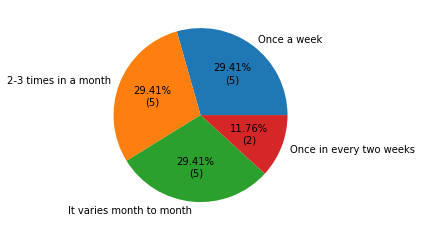

In [71]:
n_count = car_yes_df['Q13'].value_counts()
total = car_yes_df['Q13'].count()
plt.pie(n_count, labels=n_count.index, autopct=myformat)
plt.show()

35.29411852359772
17.64705926179886
17.64705926179886
17.64705926179886
11.764705926179886


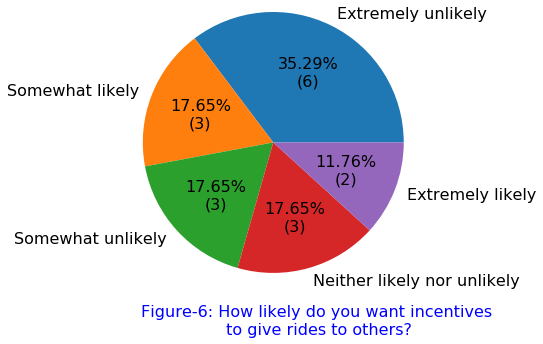

In [133]:
text = "Figure-6: How likely do you want incentives\n to give rides to others?"
n_count = car_yes_df['Q15'].value_counts()
total = car_yes_df['Q15'].count()
plt.pie(n_count, labels=n_count.index,  radius=1.5, autopct=myformat)
plt.text(0.5, -2.2, text, ha='center', color='BLUE')
plt.show()

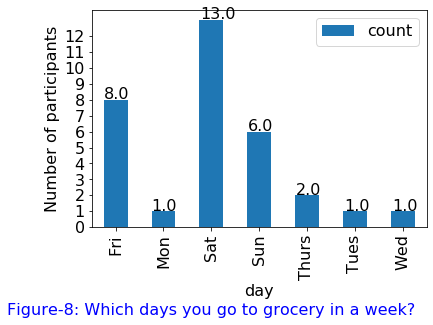

In [184]:
new = car_yes_df['Q18'].str.split(",", n=7, expand=True)
n_sat = 0
n_sun = 0
n_mon = 0
n_tues = 0
n_wed = 0
n_thurs = 0
n_fri = 0

n = new.shape[1]

new1 = new.apply(pd.Series.value_counts)
new1['count'] = new1.sum(axis=1)
new1 = new1.drop(columns= [0,1,2,3])


ax = new1.plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

text = "Figure-8: Which days you go to grocery in a week?"
plt.yticks(np.arange(car_yes_df.shape[1]))
plt.ylabel('Number of participants')
plt.xlabel('day')
plt.text(2, -5.5, text, ha='center', color='BLUE')
plt.show()

In [186]:
new['time'] = car_yes_df['Q20']
new

,0,1,2,3,time
0,Thurs,None,None,None,Afternoon
1,Sat,Sun,Thurs,Fri,Afternoon
2,Sat,Tues,None,None,Evening
3,Sat,None,None,None,Noon
4,Sat,Sun,None,None,Morning
5,Sat,Sun,None,None,Evening
6,Sat,Sun,None,None,Afternoon
7,Fri,None,None,None,Evening
8,Sat,Fri,None,None,Afternoon
9,Sat,Fri,None,None,Afternoon


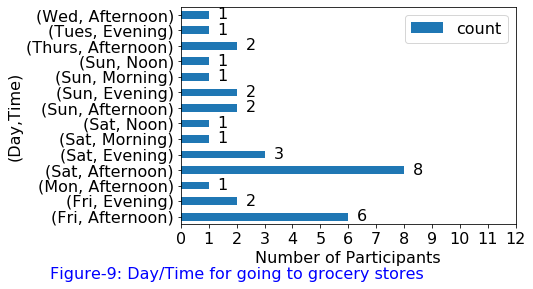

In [247]:
new.columns = ['day1', 'day2', 'day3', 'day4', 'time']
group1 = new.groupby(['day1', 'time']).size()
group2 = new.groupby(['day2', 'time']).size()
group3 = new.groupby(['day3', 'time']).size()
group4 = new.groupby(['day4', 'time']).size()

merged_gr = pd.concat([group1, group2, group3, group4], axis=1)
merged_gr['count'] = merged_gr.sum(axis=1)
merged_gr=merged_gr.drop(columns=[0,1,2,3])

ax = merged_gr.plot(kind='barh')
for p in ax.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{}'.format(int(width)),
             ha='center', va='center')

text = "Figure-9: Day/Time for going to grocery stores"
plt.xticks(np.arange(car_yes_df.shape[1]))
plt.ylabel('(Day,Time)')
plt.xlabel('Number of Participants')
plt.text(2, -4, text, ha='center', color='BLUE')
plt.show()    
    

## How much incentive willing to GET

58.82353186607361
23.52941185235977
11.764705926179886
5.882352963089943


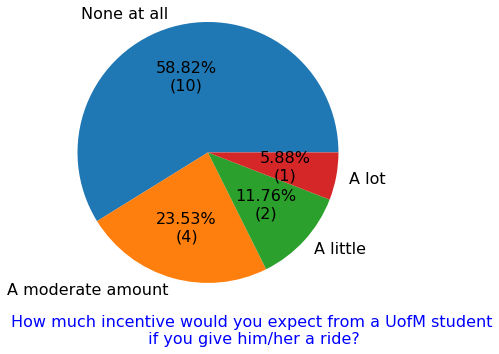

In [17]:
text = "How much incentive would you expect from a UofM student\n if you give him/her a ride?"
n_count = car_yes_df['Q16'].value_counts()
total = car_yes_df['Q16'].count()
plt.pie(n_count, labels=n_count.index,  radius=1.5, autopct=myformat)
plt.text(0.5, -2.2, text, ha='center', color='BLUE')
plt.show()